<a href="https://colab.research.google.com/github/harnalashok/Clustering/blob/master/vector_quantization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Last amended: 2nd April, 2021
# Myfolder:
# Objective(s):
#              Face image compression
#              through vector-quantization 
#
# Ref:
#     https://scikit-learn.org/stable/auto_examples/cluster/plot_face_compress.html#vector-quantization-example
#
#


# Vector Quantization Example

Face, a 1024 x 768 size image of a raccoon face,
is used here to illustrate how `k`-means is
used for vector quantization. Vector quantization finds applications, for example, in weights clustering in a neural network. See [this example](https://www.tensorflow.org/model_optimization/guide/clustering/clustering_example).


#### Libraries

In [1]:
# 1.0 Call libraries
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.misc import face
from sklearn import cluster
%matplotlib inline

In [2]:
# 1.1 Display multiple commands output from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

 `scipy.misc.face(gray=False)` :  Get a 1024 x 768, color image of a raccoon face.

#### Explore data

In [3]:
# 1.2 Get only gray image
r_face = face(gray=True)
r_face.shape    # (768, 1024)

(768, 1024)

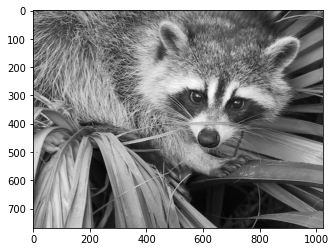

In [4]:
# 1.3 Plot racoon now in gray scale
_= plt.imshow(r_face, cmap = 'gray')

### Perform kmeans clustering
Perform k-means clustering and image compression

In [5]:
# 2.0 For clustering, 
#     we need an (n_sample, n_feature) array
#     We have only one feature with varying
#     pixel-intensities. This problem is a 
#     1D clustering problem, like finding
#     cluster in a sequence of numbers, as:
#     2,4,10,100,300,800
#     (as we do in class to explain kMeans)

X = r_face.reshape((-1, 1))
X.shape    # (786432, 1)  NOT (786432, )
print("\n----\n")
X[:5]

(786432, 1)


----



array([[114],
       [130],
       [145],
       [147],
       [147]], dtype=uint8)

In [6]:
# 2.1 Perform clustering now:

n_clusters = 5
k_means = cluster.KMeans(
                         n_clusters=n_clusters                         
                         )
k_means.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
# 2.1.1 Cluster labels for each
#       pixel:

labels = k_means.labels_
len(k_means.labels_)    # 786432
print("\n-----\n")
labels[:4]

786432


-----



array([2, 2, 3, 3], dtype=int32)

In [8]:
# 2.1.2 Cluster centers:

clus_centers = k_means.cluster_centers_
clus_centers   # 5 cluster centers

array([[194.13840989],
       [ 27.62031146],
       [114.05158855],
       [152.77772692],
       [ 74.85967928]])

#### One way to create new set of points

In [9]:
# 2.1.3
sp= clus_centers.flatten()

In [10]:
# 2.1.4
X_new = sp[list(labels)]
print()
X_new.shape
print()
X_new[:10]

(786432,)

array([114.05158855, 114.05158855, 152.77772692, 152.77772692,
       152.77772692, 152.77772692, 152.77772692, 152.77772692,
       152.77772692, 114.05158855])

#### Compress image

In [11]:
# 3.0 Remove axes of length one from values
#     Flatten array:

clus_centers.squeeze()
clus_centers = clus_centers.squeeze()

array([194.13840989,  27.62031146, 114.05158855, 152.77772692,
        74.85967928])

`numpy.choose(index-array, choices)` Construct an array from an index array and a set of arrays to choose from. Use index-array to index into choises and extract output.

In [12]:
# 3.1 Learn to work with: np.choose()
#     Construct an array from an index array and a set of arrays to choose from.
# See: https://stackoverflow.com/a/24450567

i_array = [2,2,4,4,0,1,1]
i_array
print("\n---\n")
clus_centers
print("\n---\n")
np.choose(i_array, clus_centers)
print("\n---\n")

[2, 2, 4, 4, 0, 1, 1]


---



array([194.13840989,  27.62031146, 114.05158855, 152.77772692,
        74.85967928])


---



array([114.05158855, 114.05158855,  74.85967928,  74.85967928,
       194.13840989,  27.62031146,  27.62031146])


---



In [13]:
# 3.2 Create an array from labels (index-array)
#     by indexing into 'clus_centers'.
# Pick a value from 'clus_centers' corresponding
# to 'labels' serving as index into 'clus_centers'

face_compressed = np.choose(labels, clus_centers)
face_compressed.shape   # (786432,)
print("\n-----\n")
face_compressed[:10]

(786432,)


-----



array([114.05158855, 114.05158855, 152.77772692, 152.77772692,
       152.77772692, 152.77772692, 152.77772692, 152.77772692,
       152.77772692, 114.05158855])

In [14]:
# 3.3 To plot face_compresses, 
#     reshape it, as:

face_compressed.shape = r_face.shape
face_compressed.shape   # (768, 1024)

(768, 1024)

In [15]:
# 3.4 Also calculate pixel-intensity range
#     vmin and vmax define the data range
#     that the colormap covers :

vmin = r_face.min()
vmax = r_face.max()
vmin
print()
vmax

0

250

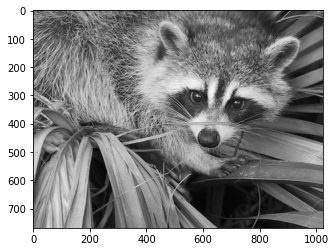

In [16]:
# 4.0 Original face
#plt.figure(1, figsize=(3, 2.2))
_=plt.imshow(
              r_face,
              cmap=plt.cm.gray,
              vmin=vmin,
              vmax=256
           )

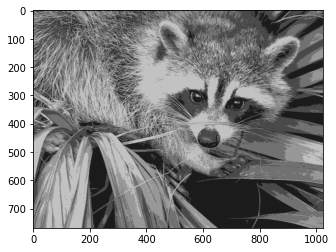

In [17]:
# 4.1 Compressed face
#_=plt.figure(2, figsize=(3, 2.2))
_=plt.imshow(
              face_compressed,
              cmap=plt.cm.gray,
              vmin=vmin,
              vmax=256
             )


### Image compression based on Prob distribution plot   
One way to discover centroids is by using pdf (prob distribution plot). Let us say, within one std deviation of mean, we have one centroid each, to the left and to the right ('c' and 'd') and within two std deviations of mean we have another two centroids ('b' and 'e'), one each to the left and to the right that is within 2 std devs we have a total of four centroids ('b', 'c', 'd' and 'e'). And in the rest of region (till infinity) we have just two more centroids ('a' and 'f'). 
All points in the distribution that are nearer to 'a' get assigned that value, all points nearer to 'b' are assigned the value of the point 'b' and so on. Thus, finally all points in the data have just six values. 

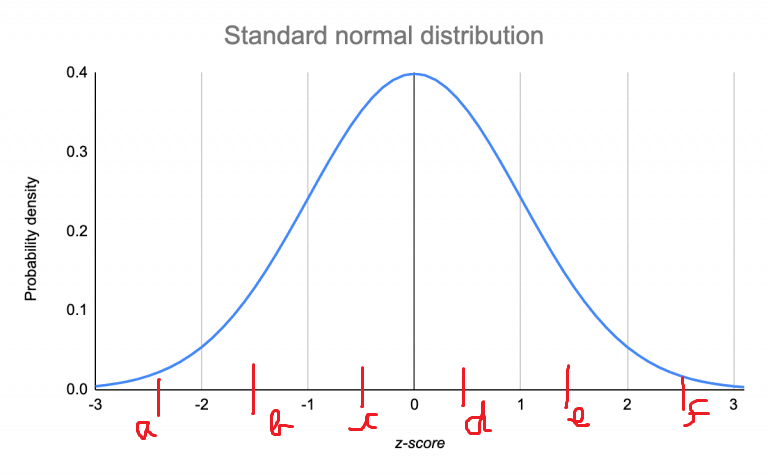

The final picture will be something as below:

Revised discrete probability distribution would be as follows:

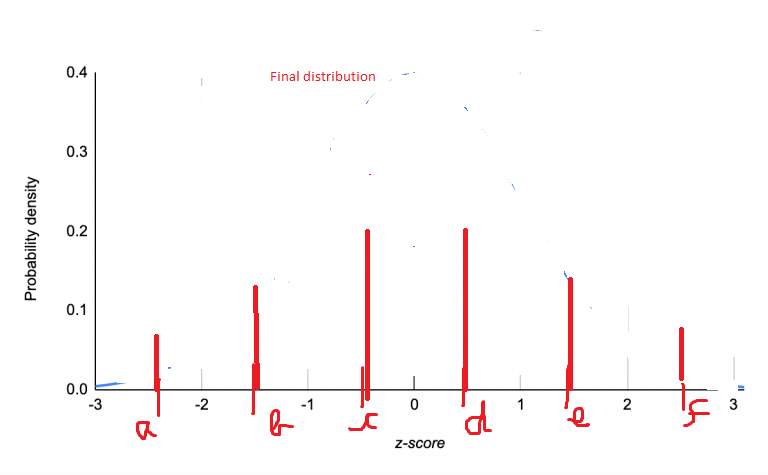

However, for the sake of ease of calculations, we will create 5-equal sized bins and within each bin, at its center, would be a Centroid. Starting from 0 and ending at 256, get six equally spaced points from interval: (0-256).   

In [18]:
# 5.0 Create 5-bins:
# Give as many equally spaced values as there
#  are clusters. These values will serve as 
#   boundaries of our bins:

# We want 6 values even though we have 5-clusters
# We, therefore, get 5-bins. We then calculate mid-point
# of each bin. This will be our centroid:

bin_boundary_pts = np.linspace(0, 256, n_clusters + 1)
bin_boundary_pts

array([  0. ,  51.2, 102.4, 153.6, 204.8, 256. ])

Calcuate mean of each bin:

In [19]:
# 5.1
bin_boundary_pts
print()
# 5.1.1
# All but first value
bin_boundary_pts[1:] 
print()
# 5.1.2
bin_boundary_pts[:-1]
print()
# 5.1.3
bin_boundary_pts[1:]  +  bin_boundary_pts[:-1]
print()
# 5.1.4
(bin_boundary_pts[1:]  +  bin_boundary_pts[:-1]) * 0.5
# 5.1.5 Here is the mean of each bin
#       These are our 'centroids'
bin_center_pts = .5 * (bin_boundary_pts[1:] + bin_boundary_pts[:-1])  
# 5.1.6
print()
bin_center_pts

array([  0. ,  51.2, 102.4, 153.6, 204.8, 256. ])

array([ 51.2, 102.4, 153.6, 204.8, 256. ])

array([  0. ,  51.2, 102.4, 153.6, 204.8])

array([ 51.2, 153.6, 256. , 358.4, 460.8])

array([ 25.6,  76.8, 128. , 179.2, 230.4])

array([ 25.6,  76.8, 128. , 179.2, 230.4])

#### Get cluster labels
We now get cluster label for each one of the points in our data.

Our next task is to drop each pixel in `r_face` to correct bin. We will use `np.searchsorted()`. `np.searchsorted()` will tell us the index position in `bin_center_pts` where each value of `r_face` would fall. 

`numpy.searchsorted()` function is used to find the *indices* (note again, we have to find indices or *bin-number*) into a sorted array, `bin_center_pts` in our case, such that, if elements (from `r_face`) are inserted <u>before</u> the indices, the order of `bin_center_pts` would be still preserved. 

In [20]:
# 6.0 Learning np.searchsorted()
# 6.1
np.searchsorted([1,2,3,4,5], 3)
print()
# 6.2
np.searchsorted([1,2,3,4,5], 3, side='right')
print()
# 6.3
np.searchsorted([1,2,3,4,5], [-10, 10, 2, 3])

2

3

array([0, 5, 1, 2])

In [27]:
# 6.4 Get indicies of positions into bin_center_pts
bin_center_pts[:7]
print("\n-----\n")
r_face[:5]
print("\n-----\n")
bin_labels = np.searchsorted(bin_center_pts, r_face) 
bin_labels
print("\n-----\n")
# 6.5
bin_labels.min()    # 0
print()
bin_labels.max()    # 5 (Greater than 4)

array([ 25.6,  76.8, 128. , 179.2, 230.4])


-----



array([[114, 130, 145, ..., 119, 129, 137],
       [ 83, 104, 123, ..., 118, 134, 146],
       [ 68,  88, 109, ..., 119, 134, 145],
       [ 78,  94, 109, ..., 119, 124, 128],
       [ 99, 109, 119, ..., 118, 114, 112]], dtype=uint8)


-----



array([[2, 3, 3, ..., 2, 3, 3],
       [2, 2, 2, ..., 2, 3, 3],
       [1, 2, 2, ..., 2, 3, 3],
       ...,
       [2, 2, 2, ..., 3, 3, 3],
       [2, 2, 2, ..., 3, 3, 3],
       [2, 2, 2, ..., 3, 3, 3]])


-----



0

5

In [28]:
# 6.6 Flatten bin_labels
bin_labels.ravel()

array([2, 3, 3, ..., 3, 3, 3])

In [29]:
# 6.7 Note bin_labels extremes 
min(bin_labels.ravel())    #  0
print()
max(bin_labels.ravel())    #  5  More than cluster numbers

0

5

In [ ]:
# 7.0 Experiment with mode='clip'
# mode: clip:  negative integers are mapped to 0;
#              values greater than n-1 are mapped to n-1; 
# 
bin_center_pts
print()
# 7.1 Note how index '-1' and '6' are clipped to 0 and to 4 
np.choose(
           [-1,1,2,6],         # Indices
           bin_center_pts,     # Get values corresponding to above
           mode = "clip"       # Clip -ve and high values
           )

array([ 25.6,  76.8, 128. , 179.2, 230.4])

array([ 25.6,  76.8, 128. , 230.4])

In [30]:
# 8.0 Finally replace pixel intensities
#     with 'bin' centroids
binned_face = np.choose(
                          bin_labels.ravel(),
                          bin_center_pts,
                          mode = "clip"
                         )

print()
binned_face[:10]

array([128. , 179.2, 179.2, 179.2, 179.2, 179.2, 179.2, 179.2, 179.2,
       179.2])

In [31]:
# 8.1 Reshape binned_face for plotting
binned_face.shape = r_face.shape

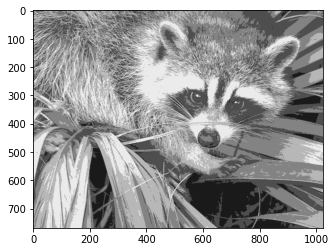

In [32]:
# 8.2 Plot the binned face now
#_=plt.figure(3, figsize=(3, 2.2))
_=plt.imshow(
              binned_face,
              cmap=plt.cm.gray,
              vmin=vmin,
              vmax=vmax
             )

#### Drawing histogram
We draw a hostogram displaying distribution of pixel intensities.

In [ ]:
# 9.0 An expt
np.sort(clus_centers)
print()
# 9.0.1
clus_centers[:-1]
print()
# 9.0.2
clus_centers[1:]
print()
# 9.0.3
list(zip(clus_centers[:-1], clus_centers[1:]))

array([ 26.59547247,  72.97293392, 112.11564253, 151.23100509,
       193.5128744 ])

array([ 72.97293392, 151.23100509, 112.11564253,  26.59547247])

array([151.23100509, 112.11564253,  26.59547247, 193.5128744 ])

[(72.97293392121179, 151.23100508822645),
 (151.23100508822645, 112.11564253178251),
 (112.11564253178251, 26.595472474400083),
 (26.595472474400083, 193.51287439650721)]

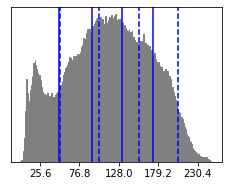

In [ ]:
# Histogram
_=plt.figure(4, figsize=(3, 2.2))
# plt.close() closes the figure window entirely,
# where plt.clf() will just clear the figure
#  you can still paint another plot onto it.
_=plt.clf()  # Clear figure

# Axes boundaries
_=plt.axes([.01, .01, .98, .98])

# Plot histogram of X-values
_=plt.hist(X, bins=256, color='.5', edgecolor='.5')

# No y-ticks
_=plt.yticks(())
# But plot x-ticks
_=plt.xticks(bin_center_pts)

clus_centers = np.sort(clus_centers)
for center_1, center_2 in zip(clus_centers[:-1], clus_centers[1:]):
    _=plt.axvline(.5 * (center_1 + center_2), color='b')

for center_1, center_2 in zip(bin_center_pts[:-1], bin_center_pts[1:]):
    _=plt.axvline(.5 * (center_1 + center_2), color='b', linestyle='--')

plt.show()

In [ ]:
############ I am done #################